629


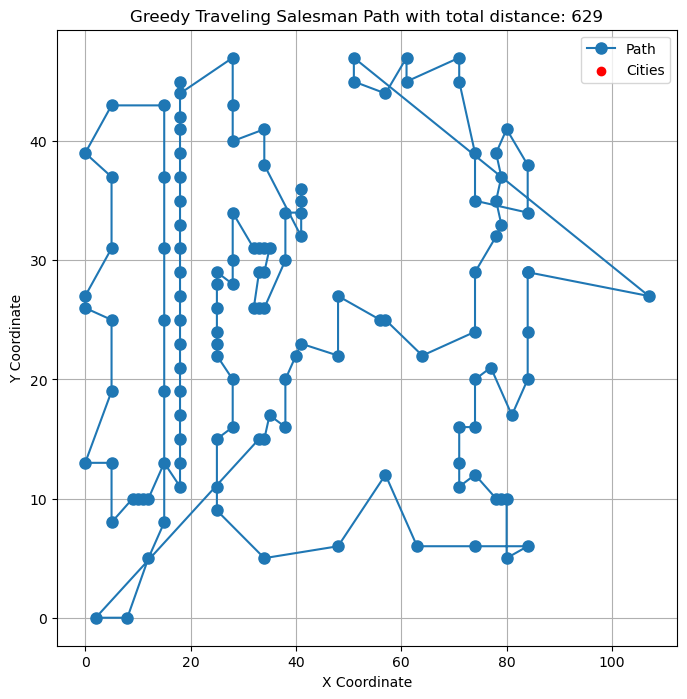

In [3]:
import numpy as np

from Greedy import greedy_tsp_from_tsplib, plot_path
from QLearningAgent import QLearningAgent
from TSPenv import TSPEnv

problem, start_path, total_distance = greedy_tsp_from_tsplib('xqf131.tsp')
print(total_distance)
plot_path(start_path, problem.node_coords, total_distance)

In [3]:
train_env = TSPEnv(problem)
train_env.reset()

agent = QLearningAgent(train_env)

agent.train(episodes=10000)

Episode 100/10000 - Avg Reward: 152007.31, Epsilon: 0.9048
Episode 200/10000 - Avg Reward: 150042.49, Epsilon: 0.8186
Episode 300/10000 - Avg Reward: 149614.44, Epsilon: 0.7407
Episode 400/10000 - Avg Reward: 148589.58, Epsilon: 0.6702
Episode 500/10000 - Avg Reward: 146627.1, Epsilon: 0.6064
Episode 600/10000 - Avg Reward: 146418.75, Epsilon: 0.5486
Episode 700/10000 - Avg Reward: 144883.3, Epsilon: 0.4964
Episode 800/10000 - Avg Reward: 143714.59, Epsilon: 0.4491
Episode 900/10000 - Avg Reward: 144317.4, Epsilon: 0.4064
Episode 1000/10000 - Avg Reward: 143957.31, Epsilon: 0.3677
Episode 1100/10000 - Avg Reward: 145088.84, Epsilon: 0.3327
Episode 1200/10000 - Avg Reward: 145940.68, Epsilon: 0.3010
Episode 1300/10000 - Avg Reward: 147344.39, Epsilon: 0.2724
Episode 1400/10000 - Avg Reward: 148453.7, Epsilon: 0.2464
Episode 1500/10000 - Avg Reward: 152453.24, Epsilon: 0.2230
Episode 1600/10000 - Avg Reward: 160700.73, Epsilon: 0.2017
Episode 1700/10000 - Avg Reward: 147433.4, Epsilon: 0

In [4]:
test_env = TSPEnv(problem)
agent.env = test_env
best_path = []
best_reward = np.inf

for i in range(problem.dimension):
    state, info = test_env.reset(start=i)
    done = False
    total_reward = 0
    path = [state + 1]

    while not done:
        action = agent.eval_choose_action(state)
        next_state, reward, terminated, truncated, _ = test_env.step(action)
        done = terminated or truncated
        state = next_state
        path.append(state + 1)
        total_reward += problem.get_weight(path[-2], path[-1])
    if total_reward < best_reward:
        best_path = path
        best_reward = total_reward

print(f"Total distance: {best_reward}")
print(best_path)
test_env.close()

Total distance: 5395
[919, 918, 917, 973, 1023, 1051, 1085, 1084, 1050, 1083, 1048, 1021, 1081, 971, 972, 913, 912, 910, 909, 908, 907, 906, 905, 904, 903, 969, 902, 901, 968, 967, 966, 965, 1077, 1076, 1045, 1020, 1005, 963, 1004, 1019, 1044, 1075, 962, 1003, 1017, 1042, 1074, 961, 1002, 1016, 1041, 1072, 960, 1001, 1015, 1040, 1071, 1106, 1014, 1039, 1013, 1038, 1012, 1000, 1070, 1069, 1112, 1111, 1110, 1068, 1037, 1011, 999, 955, 882, 881, 880, 879, 877, 876, 875, 954, 998, 1010, 1036, 1067, 997, 1009, 1035, 1066, 1105, 996, 1008, 1034, 1065, 1104, 995, 1007, 1033, 1064, 1103, 994, 992, 991, 990, 953, 952, 951, 950, 989, 949, 948, 947, 988, 1030, 1060, 1098, 1031, 1061, 1100, 1107, 1124, 1137, 1138, 1167, 1166, 1257, 1256, 1255, 1254, 1299, 1300, 1320, 1341, 1366, 1400, 1365, 1339, 1399, 1398, 1397, 1464, 1463, 1462, 1461, 1448, 1447, 1446, 1445, 1444, 1420, 1382, 1352, 1333, 1357, 1388, 1326, 1349, 1377, 1322, 1344, 1343, 1369, 1340, 1308, 1275, 1201, 1208, 1215, 1223, 1230, 1236, 

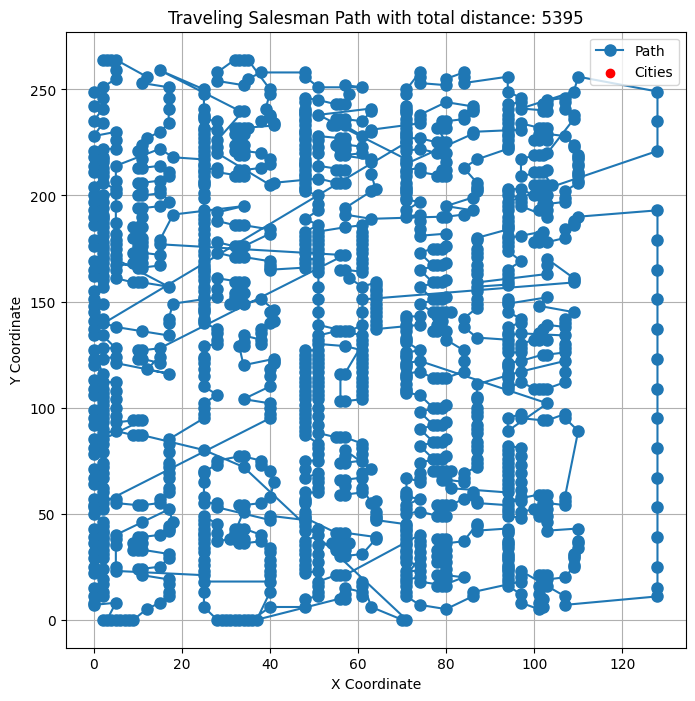

In [5]:
import matplotlib.pyplot as plt


def plot_path(path, node_coords):
    # 提取路径中每个城市的坐标
    x_coords = [node_coords[city][0] for city in path]
    y_coords = [node_coords[city][1] for city in path]

    # 绘制路径
    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, marker="o", markersize=8, label="Path")  # 连线
    plt.scatter(x_coords, y_coords, c="red", label="Cities")  # 城市点

    # 设置图形标题和坐标轴
    plt.title(f"Traveling Salesman Path with total distance: {best_reward}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.show()


plot_path(best_path, problem.node_coords)